<img align="right" src = "https://raw.githubusercontent.com/arsilva87/statsbook/main/figs/figura_thumbnail.png" width="25%" height="25%">

Códigos em R do livro: **Estatística Decodificada** (Silva, A.R. 2021) 

Capítulo 13: **Análise de resíduos**
____

In [1]:
# Dados camadassolo.csv
solo <- read.csv("https://raw.githubusercontent.com/arsilva87/statsbook/main/datasets/camadassolo.csv")
head(solo)

,US,DS,RP,CO,Argila,Tensao,Camada
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>
1,6.85,1.77,4.37,9.94,16,83.0,0-20
2,10.61,1.58,1.64,26.89,13,64.7,0-20
3,6.63,1.79,5.15,9.94,18,93.5,0-20
4,6.63,1.78,4.83,9.94,18,87.5,0-20
5,10.72,1.57,0.40,27.80,12,61.0,0-20
6,11.93,1.56,0.74,24.18,12,61.9,0-20


In [2]:
# modelo linear
m1 <- lm(RP ~ DS, data = solo)
m1


Call:
lm(formula = RP ~ DS, data = solo)

Coefficients:
(Intercept)           DS  
     -19.62        13.49  


____
**Resíduos ordinários**

In [3]:
X <- model.matrix(m1)                   # matriz do modelo
H <- X %*% solve(t(X) %*% X, t(X))      # hat matrix
H[1:5, 1:5]                             # H das 5 primeiras observações
h <- hatvalues(m1)                      # checando
h[1:5]

,1,2,3,4,5
1,0.028711485,-0.003221289,0.032072829,0.030392157,-0.004901961
2,-0.003221289,0.025518207,-0.006246499,-0.004733894,0.027030812
3,0.032072829,-0.006246499,0.036106443,0.034089636,-0.008263305
4,0.030392157,-0.004733894,0.034089636,0.032240896,-0.006582633
5,-0.004901961,0.027030812,-0.008263305,-0.006582633,0.028711485


1          2          3          4          5 
0.02871148 0.02551821 0.03610644 0.03224090 0.02871148

In [4]:
y <- solo$RP
ro <- drop( y - H %*% y )    # residuos ordinarios
ro[1:5]
residuals(m1)[1:5]           # checando

1           2           3           4           5 
 0.11355742 -0.05367787  0.62379272  0.43867507 -1.15879552

1           2           3           4           5 
 0.11355742 -0.05367787  0.62379272  0.43867507 -1.15879552

In [5]:
s2 <- drop( var(ro) )   # variância residual
s2
var.ro <- (1 - h)*s2    # var dos 'ro'
var.ro[1:5]

[1] 0.3501095

1         2         3         4         5 
0.3400574 0.3411754 0.3374683 0.3388217 0.3400574

____
**Resíduos padronizados**

In [6]:
rp <- rstandard(m1)
rp[1:5]

1          2          3          4          5 
 0.1935563 -0.0913428  1.0673127  0.7490749 -1.9751432

____
**Resíduos estudentizados**

In [7]:
rs <- rstudent(m1)
rs[1:5]

1           2           3           4           5 
 0.19241642 -0.09078874  1.06823068  0.74705371 -2.01149470

In [8]:
n <- nrow(solo)                             # n dados
n
p <- 2                                      # n parâmetros do modelo
li.rs <- qt(0.025/(2*n), df = 84 - 2)       # limite inferior
li.rs
ls.rs <- qt(1 - 0.025/(2*n), df = 84 - 2)   # limite superior
ls.rs

which(rs < li.rs)                           # teste: rs abaixo
which(rs > ls.rs)                           # teste: rs acima

[1] 84

[1] -3.77887

[1] 3.77887

named integer(0)

78 
78

____
**Medidas de influência**

In [9]:
dff <- dffits(m1)
dff[1:5]
which(abs(dff) > sqrt(4*p/n))  # testando os limites

1           2           3           4           5 
 0.03308231 -0.01469164  0.20674873  0.13635521 -0.34583790

5 18 20 22 78 80 
 5 18 20 22 78 80

____
**Análise gráfica**

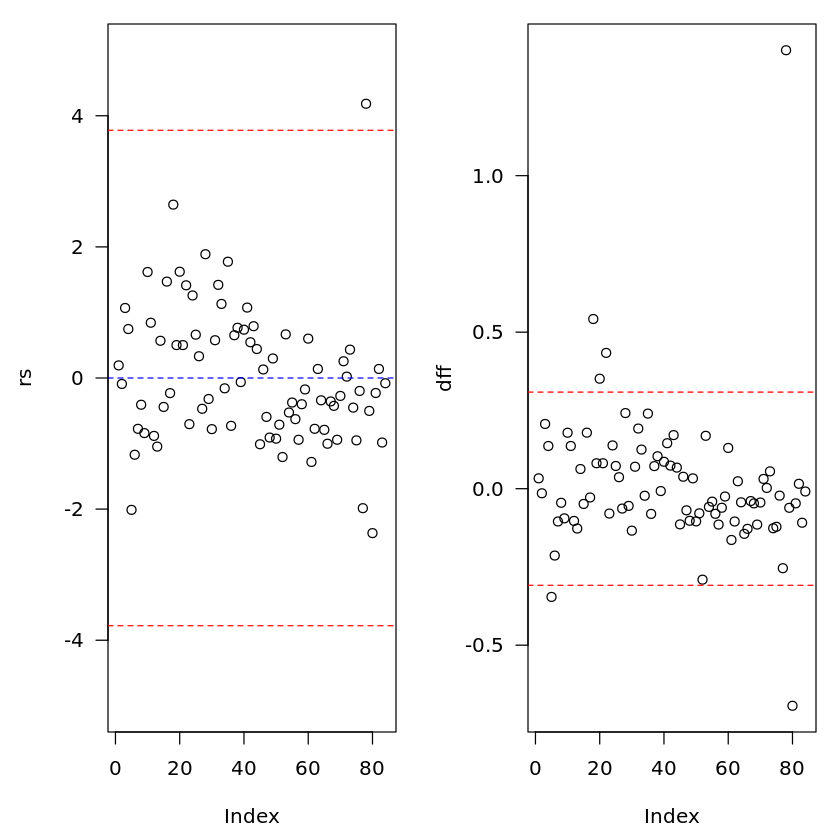

In [10]:
# Gráfico de índices de resíduos ordinários
par(mfrow = c(1, 2), mar = c(4.5, 4.5, 1, 1), las = 1)
plot(rs, ylim = c(-5, 5))
abline(h = c(li.rs, 0, ls.rs), lty = 2, col = c(2, 4, 2))

# Gráfico de índices de DFfits
plot(dff)
abline(h = c(-sqrt(4*p/n), sqrt(4*p/n)), lty = 2, col = "red")

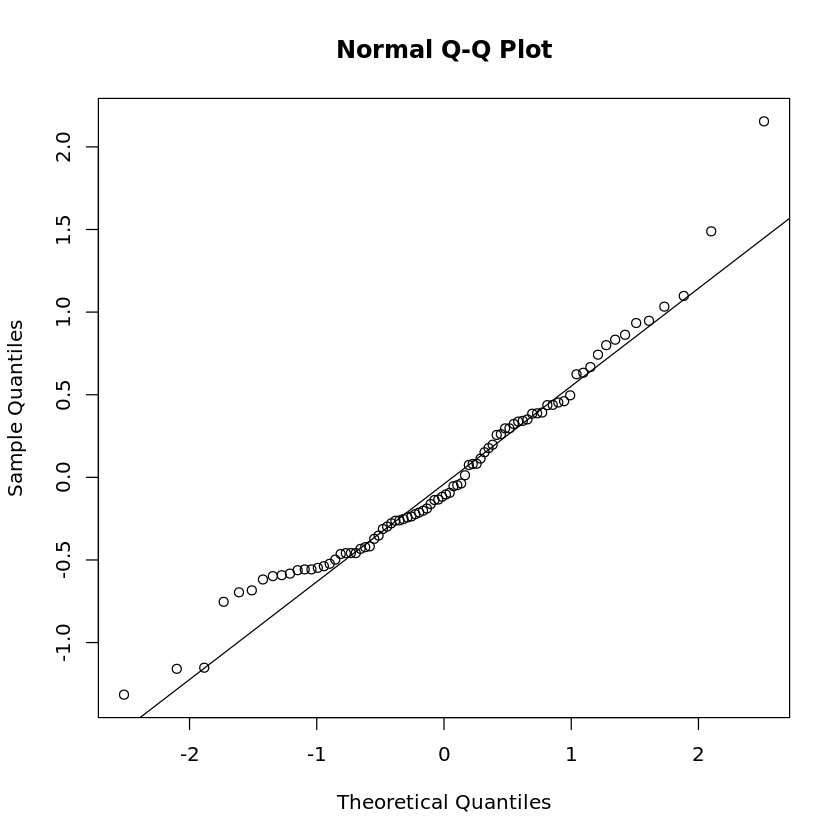

In [11]:
# QQ-normal
qqnorm(ro)
qqline(ro)

Loading required package: MASS



Gaussian model (lm object) 


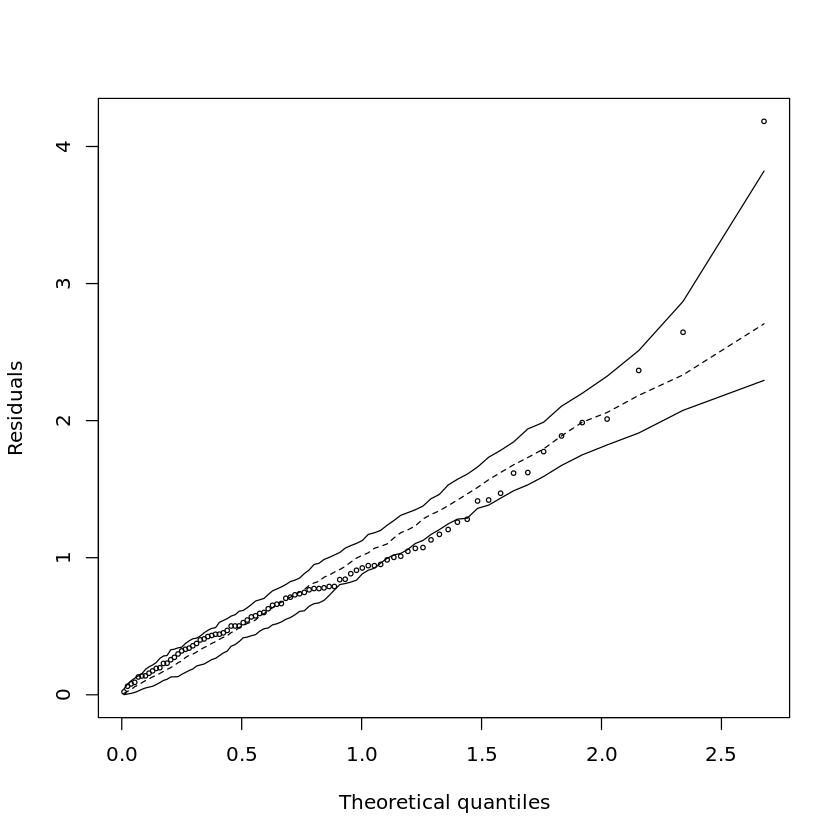

In [13]:
library("hnp")
hnp(m1)